## UK ECONOMICS DURING INDUSTRIAL REVOLUTION

 **<font color='teal'>This data contains Agriculture, Industry, Services, GDP, and Consumer Prices data from 1700 to 1870 during Industrial Revolution. The Industrial Revolution was the transition to new manufacturing processes in Great Britain, continental Europe, and the United States, that occurred during the period from around 1760 to about 1820–1840. This transition included going from hand production methods to machines, new chemical manufacturing and iron production processes, the increasing use of steam power and water power, the development of machine tools and the rise of the mechanized factory system. Output greatly increased, and a result was an unprecedented rise in population and in the rate of population growth.</font>**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('UK_cpi.xlsx')

In [3]:
df.head()

,Year,Agriculture,Industry,Services,GDP,Nominal GDP (mln £),Agriculture-CPI,Industry-CPI,Services-CPI,GDP Deflator
0,1700,100.00,100.00,100.00,100.00,76.01,100.00,100.00,100.00,100.00
1,1701,111.06,111.86,103.49,108.97,79.13,88.55,98.09,98.05,95.53
2,1702,117.74,101.11,103.02,106.16,75.83,87.00,95.44,97.89,93.97
3,1703,104.67,92.64,103.60,99.36,69.47,80.14,95.59,97.19,91.98
4,1704,131.25,117.02,109.11,118.29,85.54,87.76,97.21,98.61,95.13


In [4]:
df.columns

Index(['Year', 'Agriculture', 'Industry', 'Services', 'GDP',
       'Nominal GDP (mln £)', 'Agriculture-CPI', 'Industry-CPI',
       'Services-CPI', 'GDP Deflator'],
      dtype='object')

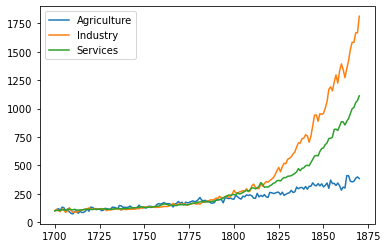

In [5]:
plt.plot(df['Year'],df['Agriculture'], label='Agriculture')
plt.plot(df['Year'],df['Industry'], label='Industry')
plt.plot(df['Year'],df['Services'], label='Services')
plt.legend()
plt.show()

 **<font color='teal'>The graphic above shows that while agriculture, industry, and service sectors rose in correlation with each other until the beginning of the 19th century, especially starting from the 1810s, industry and service sectors showed an exponential rise by separating them positively. As a result of the industrial revolution, the industrial sector has shown very strong growth by folding the service sector as well.</font>**

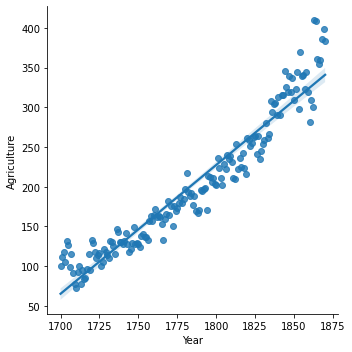

In [6]:
lmplot = sns.lmplot(x="Year", y="Agriculture", data=df)

**<font color='teal'>As can be seen in the graph above, the increase in agriculture is around a certain line.</font>**

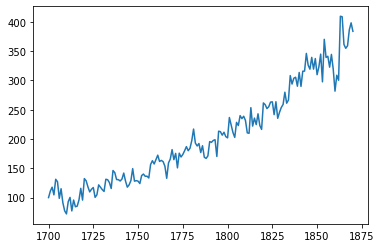

In [7]:
plt.plot(df['Year'],df['Agriculture'])

In [8]:
agr = df[['Year','Agriculture']]
agr['Year'] = pd.to_datetime(agr['Year'], format='%Y', errors='ignore')
agr.set_index('Year', inplace = True)
agr.head()

C:\Users\Ozgur\AppData\Local\Temp\ipykernel_3796\254236934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agr['Year'] = pd.to_datetime(agr['Year'], format='%Y', errors='ignore')


,Agriculture
Year,
1700-01-01,100.00
1701-01-01,111.06
1702-01-01,117.74
1703-01-01,104.67
1704-01-01,131.25


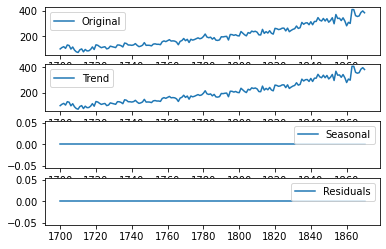

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(agr)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual= decomposition.resid

plt.subplot(411)
plt.plot(agr, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')

In [10]:
from statsmodels.tsa.stattools import kpss

kpss(agr)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(1.9283128474012423,
 0.01,
 8,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

<AxesSubplot:xlabel='Year'>

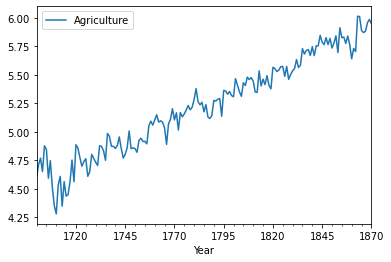

In [11]:
y_log = np.log(agr)
y_log.plot()

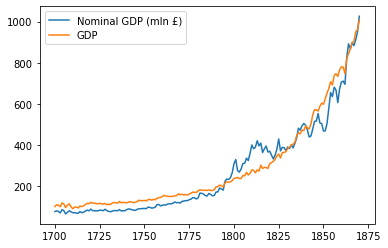

In [12]:
plt.plot(df['Year'],df['Nominal GDP (mln £)'], label='Nominal GDP (mln £)')
plt.plot(df['Year'],df['GDP'], label='GDP')
plt.legend()
plt.show()

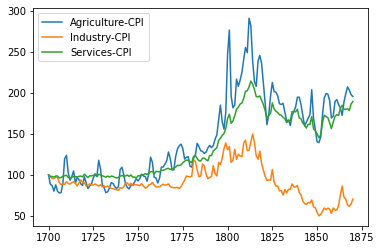

In [13]:
plt.plot(df['Year'],df['Agriculture-CPI'], label='Agriculture-CPI')
plt.plot(df['Year'],df['Industry-CPI'], label='Industry-CPI')
plt.plot(df['Year'],df['Services-CPI'], label='Services-CPI')
plt.legend()
plt.show()

**<font color='teal'>As can be seen in the chart above, there was a steady increase in prices until the beginning of the 19th century, which caused high inflation and decreased the purchasing power of the households. Along with the industrial revolution, especially after the 1810s, there was a serious decrease in prices, especially for industrial products, which led to the prosperity of the people, and as a result, a population explosion was observed. Especially the cheapening of industrial materials in the world has also increased the world's production volume and welfare.</font>**

In [14]:
correlation = df.corr()
correlation

,Year,Agriculture,Industry,Services,GDP,Nominal GDP (mln £),Agriculture-CPI,Industry-CPI,Services-CPI,GDP Deflator
Year,1.000000,0.960014,0.825087,0.857678,0.867168,0.899054,0.788759,-0.204727,0.863900,0.622601
Agriculture,0.960014,1.000000,0.893311,0.914151,0.927090,0.941675,0.717882,-0.302418,0.817442,0.533595
Industry,0.825087,0.893311,1.000000,0.995601,0.996004,0.960452,0.525469,-0.541356,0.635419,0.276730
Services,0.857678,0.914151,0.995601,1.000000,0.998629,0.975870,0.581260,-0.483633,0.688712,0.345105
GDP,0.867168,0.927090,0.996004,0.998629,1.000000,0.976373,0.582346,-0.491536,0.691184,0.344453
Nominal GDP (mln £),0.899054,0.941675,0.960452,0.975870,0.976373,1.000000,0.720140,-0.314232,0.813523,0.523627
Agriculture-CPI,0.788759,0.717882,0.525469,0.581260,0.582346,0.720140,1.000000,0.284899,0.956628,0.938965
Industry-CPI,-0.204727,-0.302418,-0.541356,-0.483633,-0.491536,-0.314232,0.284899,1.000000,0.177189,0.575469
Services-CPI,0.863900,0.817442,0.635419,0.688712,0.691184,0.813523,0.956628,0.177189,1.000000,0.897628
GDP Deflator,0.622601,0.533595,0.276730,0.345105,0.344453,0.523627,0.938965,0.575469,0.897628,1.000000


<AxesSubplot:>

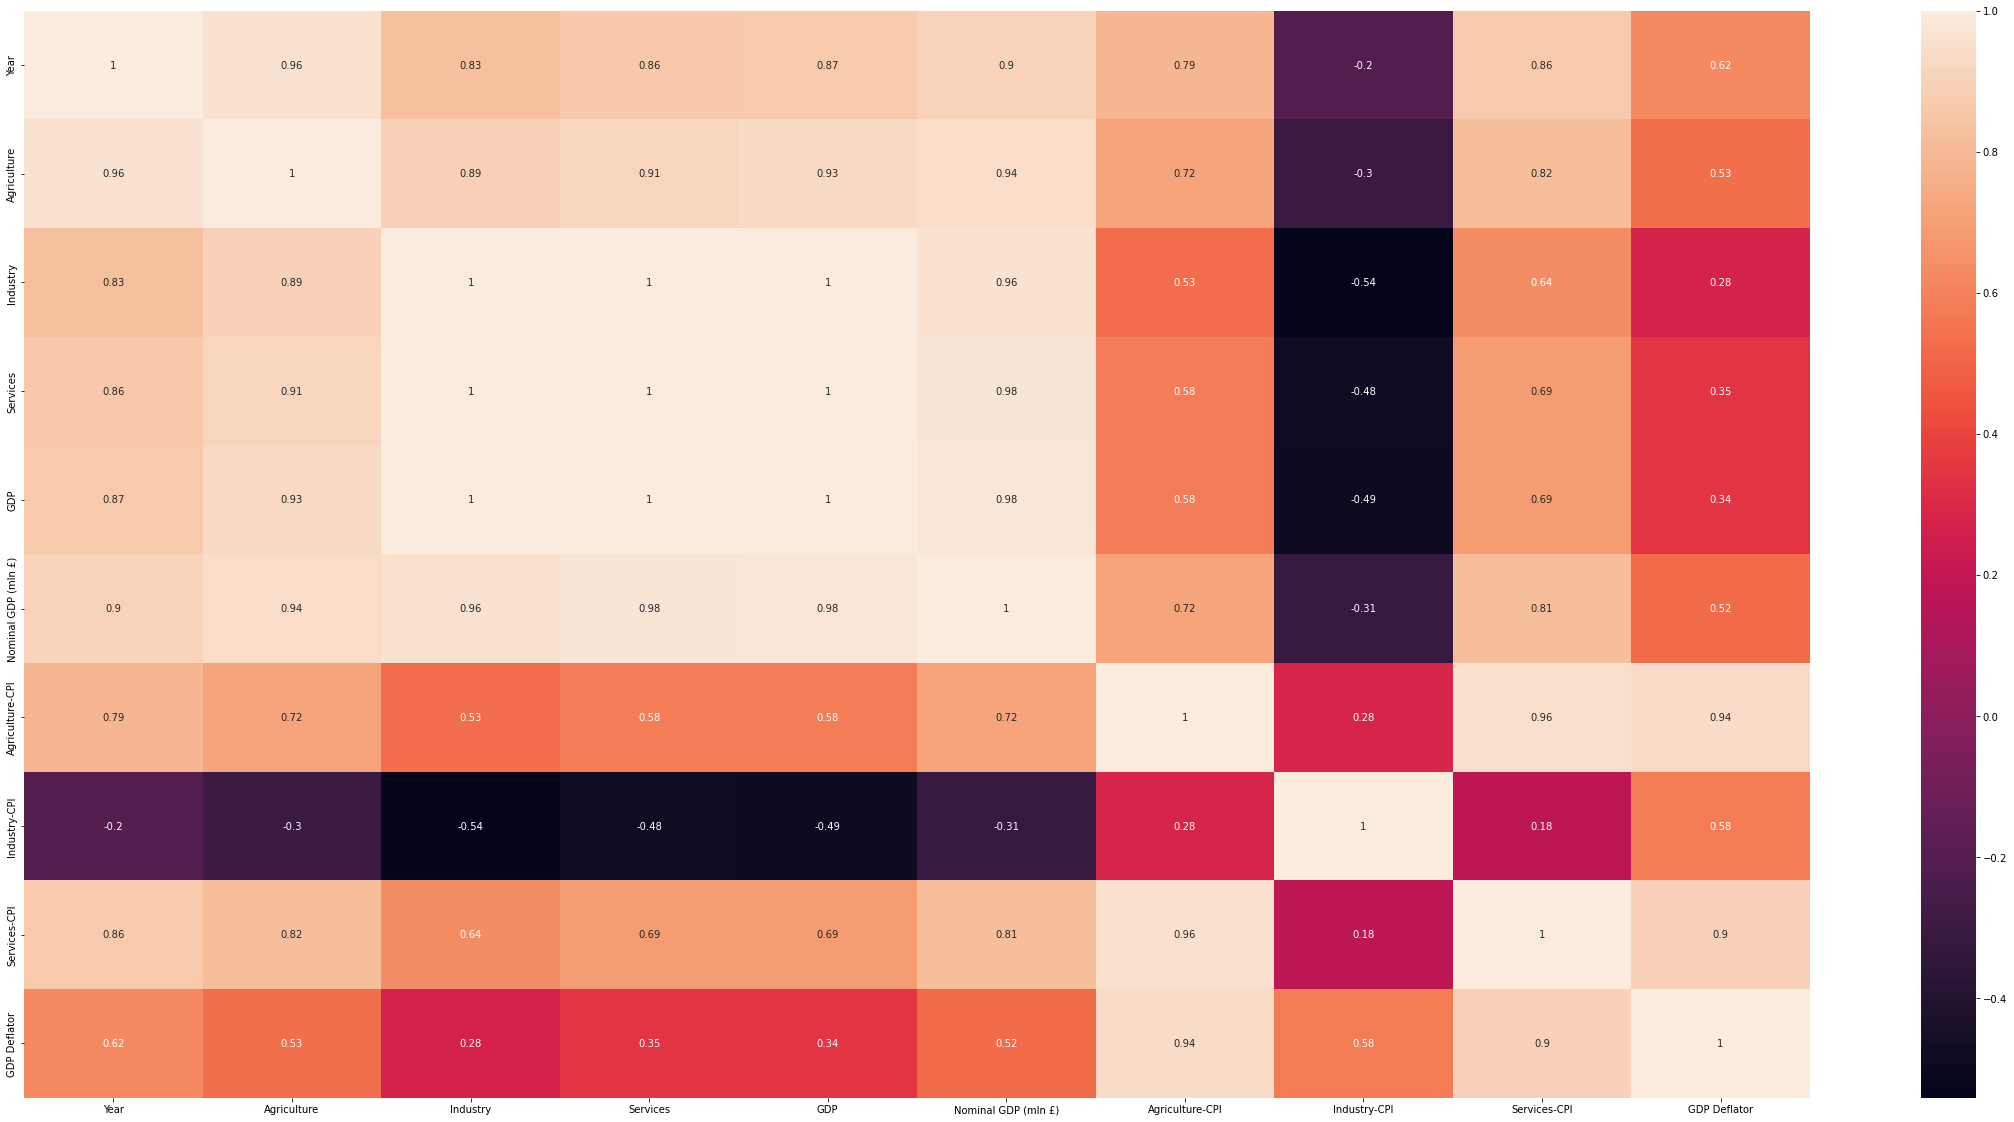

In [15]:
plt.figure(figsize=(40,20))
sns.heatmap(correlation, annot=True)

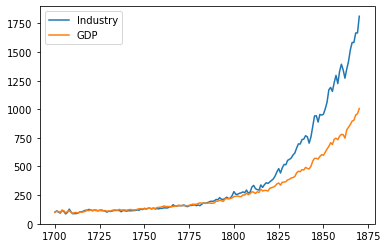

In [16]:
plt.plot(df['Year'] ,df['Industry'], label='Industry')
plt.plot(df['Year'] ,df['GDP'], label='GDP')
plt.legend()
plt.show()

**<font color='teal'>As can be seen from the table and graph, there is a strong correlation between industrial production and gross domestic product in this time period.</font>**